In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
sns.set(rc={'figure.figsize':(10,7)})
sns.set(font_scale=1)
sns.set_style("whitegrid")

spark = SparkSession.builder.appName("incident_app").getOrCreate()
# sc = spark.sparkContext

### Functions

In [128]:
def hist_plot(df:pd.DataFrame, column:str, font=10)->None:
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(df[column], ax=ax_box,orient="h")
    sns.histplot(data=df, x=column, ax=ax_hist)
    ax_box.set(xlabel='')
    plt.xticks(rotation=45 ,fontsize=font)
    plt.show()

In [30]:
spark

# Step 1: Scope the Project and Gather Data

Vision Zero is a fictitious non-profit organization that advocates for road safety and aims to eliminate traffic fatalities and severe injuries. The organization operates on the principle that all traffic accidents are preventable, and it seeks to promote a holistic approach to road safety that encompasses engineering, education, and enforcement. Vision Zero advocates for the redesign of streets and roadways to prioritize the safety of pedestrians, cyclists, and motorists. Additionally, the organization promotes the adoption of policies that reduce speeding, improve traffic enforcement, and increase public awareness of road safety issues. Through its initiatives, Vision Zero is working to create safer streets and reduce the number of traffic-related injuries and fatalities. The organization has been successful in many cities around the world, and its model has been adopted by numerous governments and organizations as a framework for improving road safety.

Data plays a critical role in reducing vehicle accidents. With the advancements in technology, vehicles are now equipped with sensors and cameras that collect data about the surrounding environment and the behavior of other drivers. This data can be analyzed to identify potential hazards and predict the likelihood of accidents. Additionally, data on driver behavior, such as speeding, distracted driving, and fatigue, can be used to identify patterns and develop targeted interventions to address these issues. Furthermore, data on road infrastructure, weather conditions, and traffic patterns can help identify areas with a higher risk of accidents and prioritize safety improvements. By leveraging data in these ways, we can develop more effective strategies for reducing vehicle accidents and improving road safety for everyone.

The scope of the project is to use data from NYC Open data regarding Motor Vehicle Collisions - Crashes and weather data obtained vai the noaa weather API. The Motor Vehicle Collision data contains a total 1 Million data points and the noaa data has weather for these data points. The data will be prepared with the goal to be used in analytics to help further the mission of Vision Zero.

The architecture goal for the project is to design a robust and scalable Data Lake that can efficiently handle large volumes of data. The Data Lake will be created using a combination of Docker, Spark, and Python, which will enable fast and reliable processing of the data. The data will be ingested from a storage bucket and processed using Docker containers, which can be easily scaled up or down depending on the processing needs. The processed data will be stored in the form of Parquet files in the destination folder, which can be easily accessed and analyzed by downstream applications. To optimize costs, the Docker containers can be disabled after processing the data, which will help in reducing the technology costs associated with the project. Overall, the architecture design will help in creating an efficient and cost-effective Data Lake that can support the needs of the business

## Data Fields

### [Motor Vehicle Collisions - Crashes](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95)

**CRASH DATE** - Occurrence date of collision Date

**CRASH TIME** - Occurrence time of collision Time

**BOROUGH** - Borough where collision occurred Plain Text

**ZIP CODE** - Postal code of incident occurrence Plain Text

**LATITUDE** - Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326) Number

**LONGITUDE** - Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326) Number

**LOCATION** - Latitude , Longitude pair Location

**ON STREET NAME** - Street on which the collision occurred Plain Text

**CROSS STREET NAME** - Nearest cross street to the collision Plain Text

**OFF STREET NAME** - Street address if known Plain Text

**NUMBER OF PERSONS INJURED** - Number of persons injured Number

**NUMBER OF PERSONS KILLED** - Number of persons killed Number

**NUMBER OF PEDESTRIANS INJURED** - Number of pedestrians injured Number

**NUMBER OF PEDESTRIANS KILLED** - Number of pedestrians killed Number

**NUMBER OF CYCLIST INJURED** - Number of cyclists injured Number

**NUMBER OF CYCLIST KILLED** - Number of cyclists killed Number

**NUMBER OF MOTORIST INJURED** - Number of vehicle occupants injured Number

**NUMBER OF MOTORIST KILLED** - Number of vehicle occupants killed Number

**CONTRIBUTING FACTOR VEHICLE 1** - Factors contributing to the collision for designated vehicle Plain Text

**CONTRIBUTING FACTOR VEHICLE 2** - Factors contributing to the collision for designated vehicle Plain Text

**CONTRIBUTING FACTOR VEHICLE 3** - Factors contributing to the collision for designated vehicle Plain Text

**CONTRIBUTING FACTOR VEHICLE 4** - Factors contributing to the collision for designated vehicle Plain Text

**CONTRIBUTING FACTOR VEHICLE 5** - Factors contributing to the collision for designated vehicle Plain Text

**COLLISION_ID** - Unique record code generated by system. Primary Key for Crash table. Number

**VEHICLE TYPE CODE 1** - Type of vehicle based on the selected vehicle category (ATV, bicycle, car/suv, ebike, escooter, truck/bus, motorcycle, other) Plain Text

**VEHICLE TYPE CODE 2** - Type of vehicle based on the selected vehicle category (ATV, bicycle, car/suv, ebike, escooter, truck/bus, motorcycle, other) Plain Text

**VEHICLE TYPE CODE 3** - Type of vehicle based on the selected vehicle category (ATV, bicycle, car/suv, ebike, escooter, truck/bus, motorcycle, other) Plain Text

**VEHICLE TYPE CODE 4** - Type of vehicle based on the selected vehicle category (ATV, bicycle, car/suv, ebike, escooter, truck/bus, motorcycle, other) Plain Text

**VEHICLE TYPE CODE 5** - Type of vehicle based on the selected vehicle category (ATV, bicycle, car/suv, ebike, escooter, truck/bus, motorcycle, other) Plain Text

In [3]:
# rdd = sc.parallelize(range(100 + 1))
# rdd.sum()

# Step 2: Explore and Assess the Data
    
## Motor Vehicle Collisions Data

* Loaded file Motor Vehicle Collisions - Crashes
* A total of 2,103 files exist
* Each file contains collisions from a particular date

In [4]:
motor_df = spark.read.option("delimiter", ",").option("header", True).option("inferSchema", "true").option("nanValue", "null",).csv("./data/staging_collision")

* Explored data infer Schema

In [5]:
motor_df.printSchema()

root
 |-- CRASH DATE: timestamp (nullable = true)
 |-- CRASH TIME: timestamp (nullable = true)
 |-- BOROUGH: string (nullable = true)
 |-- ZIP CODE: double (nullable = true)
 |-- LATITUDE: double (nullable = true)
 |-- LONGITUDE: double (nullable = true)
 |-- LOCATION: string (nullable = true)
 |-- ON STREET NAME: string (nullable = true)
 |-- CROSS STREET NAME: string (nullable = true)
 |-- OFF STREET NAME: string (nullable = true)
 |-- NUMBER OF PERSONS INJURED: double (nullable = true)
 |-- NUMBER OF PERSONS KILLED: double (nullable = true)
 |-- NUMBER OF PEDESTRIANS INJURED: integer (nullable = true)
 |-- NUMBER OF PEDESTRIANS KILLED: integer (nullable = true)
 |-- NUMBER OF CYCLIST INJURED: integer (nullable = true)
 |-- NUMBER OF CYCLIST KILLED: integer (nullable = true)
 |-- NUMBER OF MOTORIST INJURED: integer (nullable = true)
 |-- NUMBER OF MOTORIST KILLED: integer (nullable = true)
 |-- CONTRIBUTING FACTOR VEHICLE 1: string (nullable = true)
 |-- CONTRIBUTING FACTOR VEHICLE 2

* View the shape of the data

In [6]:
print((motor_df.count(), len(motor_df.columns)))

(1000184, 29)


* First 2 records from the data

In [7]:
motor_df.show(n=2,vertical=True)

-RECORD 0---------------------------------------------
 CRASH DATE                    | 2018-11-15 00:00:00  
 CRASH TIME                    | 2023-03-21 18:04:00  
 BOROUGH                       | BRONX                
 ZIP CODE                      | 10463.0              
 LATITUDE                      | 40.880135            
 LONGITUDE                     | -73.903946           
 LOCATION                      | (40.880135, -73.9... 
 ON STREET NAME                | WEST 232 STREET  ... 
 CROSS STREET NAME             | BROADWAY             
 OFF STREET NAME               | null                 
 NUMBER OF PERSONS INJURED     | 1.0                  
 NUMBER OF PERSONS KILLED      | 0.0                  
 NUMBER OF PEDESTRIANS INJURED | 0                    
 NUMBER OF PEDESTRIANS KILLED  | 0                    
 NUMBER OF CYCLIST INJURED     | 0                    
 NUMBER OF CYCLIST KILLED      | 0                    
 NUMBER OF MOTORIST INJURED    | 1                    
 NUMBER OF

* identified columns not needed for final output 

In [8]:
cols_to_drop = ('LOCATION',
                'NUMBER OF PEDESTRIANS INJURED',
                'NUMBER OF PEDESTRIANS KILLED',
                'NUMBER OF CYCLIST INJURED',
                'NUMBER OF CYCLIST KILLED',
                'NUMBER OF MOTORIST INJURED',
                'NUMBER OF MOTORIST KILLED',
                'CONTRIBUTING FACTOR VEHICLE 1',
                'CONTRIBUTING FACTOR VEHICLE 2',
                'CONTRIBUTING FACTOR VEHICLE 3',
                'CONTRIBUTING FACTOR VEHICLE 4',
                'CONTRIBUTING FACTOR VEHICLE 5',
                'VEHICLE TYPE CODE 1',
                'VEHICLE TYPE CODE 2',
                'VEHICLE TYPE CODE 3',
                'VEHICLE TYPE CODE 4',
                'VEHICLE TYPE CODE 5')

* Dropped unwanted columns
* Cache data to improve performance 

In [9]:
motor_df = motor_df.drop(*cols_to_drop)
motor_df = motor_df.cache()

In [10]:
motor_df.is_cached

True

In [11]:
motor_df.show(n=5)

+-------------------+-------------------+--------+--------+---------+----------+--------------------+-----------------+--------------------+-------------------------+------------------------+------------+
|         CRASH DATE|         CRASH TIME| BOROUGH|ZIP CODE| LATITUDE| LONGITUDE|      ON STREET NAME|CROSS STREET NAME|     OFF STREET NAME|NUMBER OF PERSONS INJURED|NUMBER OF PERSONS KILLED|COLLISION_ID|
+-------------------+-------------------+--------+--------+---------+----------+--------------------+-----------------+--------------------+-------------------------+------------------------+------------+
|2018-11-15 00:00:00|2023-03-21 18:04:00|   BRONX| 10463.0|40.880135|-73.903946|WEST 232 STREET  ...|         BROADWAY|                null|                      1.0|                     0.0|     4026845|
|2018-11-15 00:00:00|2023-03-21 08:00:00|  QUEENS| 11420.0|40.667736|-73.826614|150 AVENUE       ...|        114 PLACE|                null|                      0.0|              

In [12]:
motor_df.printSchema()

root
 |-- CRASH DATE: timestamp (nullable = true)
 |-- CRASH TIME: timestamp (nullable = true)
 |-- BOROUGH: string (nullable = true)
 |-- ZIP CODE: double (nullable = true)
 |-- LATITUDE: double (nullable = true)
 |-- LONGITUDE: double (nullable = true)
 |-- ON STREET NAME: string (nullable = true)
 |-- CROSS STREET NAME: string (nullable = true)
 |-- OFF STREET NAME: string (nullable = true)
 |-- NUMBER OF PERSONS INJURED: double (nullable = true)
 |-- NUMBER OF PERSONS KILLED: double (nullable = true)
 |-- COLLISION_ID: integer (nullable = true)



* Summarised data to identify inconsistencies
* Noticed the LONGITUDE value to be high
* Symbols exist in strings
* Characters have inconsistent lower & upper casing

In [13]:
summary_df = motor_df.describe().toPandas()
summary_df

,summary,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,COLLISION_ID
0,count,641434,641262,928440,928440,755103,482567,243830,1000167,1000154,1000184
1,mean,None,10870.685632393624,40.58503933664225,-73.67599343850819,411.0,93.89791666666667,None,0.32012053986984174,0.0014887707293076867,4048827.8008596417
2,stddev,None,540.9621835212948,2.3862603017588206,4.53260513073638,689.1352948046231,359.11480146864636,None,0.700930930816675,0.04087208863829598,289831.0833395077
3,min,BRONX,10000.0,0.0,-201.35999,Maspeth Avenue,Broadway,55-17 92nd Street,0.0,0.0,3511951
4,max,STATEN ISLAND,11697.0,41.12615,0.0,zarega avuenue,�ST 138 STREET,west street,31.0,8.0,4550397


* Sampled data to see the consistency and formatting
* Data has spacing issues
* BOROUGH is not complete

In [14]:
categorical_columns = ['BOROUGH']
for col in categorical_columns:
    print("*"*100)
    print("*"*50,col,"*"*50)
    print(motor_df.select(col).distinct().rdd.map(lambda r: r[0]).collect())

****************************************************************************************************
************************************************** BOROUGH **************************************************
[None, 'QUEENS', 'BROOKLYN', 'BRONX', 'MANHATTAN', 'STATEN ISLAND']


In [15]:
for col in ['ON STREET NAME','CROSS STREET NAME','OFF STREET NAME']:
    print("*"*100)
    print("*"*50, col,"*"*50)
    result = motor_df[[col]].sample(fraction=0.0001/2, seed=143).toPandas()
    print(result)

****************************************************************************************************
************************************************** ON STREET NAME **************************************************
                      ON STREET NAME
0   NEPTUNE AVENUE                  
1   OCEAN PARKWAY                   
2                               None
3   29 STREET                       
4   VANDERBILT AVENUE               
5                               None
6                               None
7   ROGERS AVENUE                   
8   BROOKLYN QUEENS EXPRESSWAY      
9   WEST BROADWAY                   
10                              None
11  WEST 112 STREET                 
12                              None
13  EAST 103 STREET                 
14                              None
15                              None
16  WEST FINGERBOARD ROAD           
17                              None
18  2 AVENUE                        
19  LAFAYETTE AVENUE                
20  1

* Identified null across all columns

In [16]:
for col in motor_df.columns:
    print("*"*50, col, "*"*50)
    print(col, "\t", "null values: ", motor_df.filter(motor_df[col].isNull()).count())

************************************************** CRASH DATE **************************************************
CRASH DATE 	 null values:  0
************************************************** CRASH TIME **************************************************
CRASH TIME 	 null values:  0
************************************************** BOROUGH **************************************************
BOROUGH 	 null values:  358750
************************************************** ZIP CODE **************************************************
ZIP CODE 	 null values:  358922
************************************************** LATITUDE **************************************************
LATITUDE 	 null values:  71744
************************************************** LONGITUDE **************************************************
LONGITUDE 	 null values:  71744
************************************************** ON STREET NAME **************************************************
ON STREET NAME 	 null values:

* The valid range of latitude in degrees is -90 and +90
* Longitude is in the range -180 and +180
* Noticed that LONGITUDE values with max greater than 180

In [17]:
motor_df.filter((motor_df["LONGITUDE"]==-201.35999)).select(["LATITUDE","LONGITUDE"]).show()

+---------+----------+
| LATITUDE| LONGITUDE|
+---------+----------+
|40.854286|-201.35999|
+---------+----------+



* Data points with cordinates of 0 LATITUDE & LONGITUDE exist and can lead to mapping unwanted cordinates

In [18]:
motor_df.filter((motor_df["LATITUDE"]==0)&(motor_df["LONGITUDE"]==0)).select(["LATITUDE","LONGITUDE"]).show(n=5)

+--------+---------+
|LATITUDE|LONGITUDE|
+--------+---------+
|     0.0|      0.0|
|     0.0|      0.0|
|     0.0|      0.0|
|     0.0|      0.0|
|     0.0|      0.0|
+--------+---------+
only showing top 5 rows



* Collisions that do not contain injuries and fatalities exist within the data set

In [19]:
motor_df.filter((motor_df["NUMBER OF PERSONS INJURED"]==0)&(motor_df["NUMBER OF PERSONS KILLED"]==0)).select(["NUMBER OF PERSONS INJURED","NUMBER OF PERSONS KILLED"]).show(n=5)

+-------------------------+------------------------+
|NUMBER OF PERSONS INJURED|NUMBER OF PERSONS KILLED|
+-------------------------+------------------------+
|                      0.0|                     0.0|
|                      0.0|                     0.0|
|                      0.0|                     0.0|
|                      0.0|                     0.0|
|                      0.0|                     0.0|
+-------------------------+------------------------+
only showing top 5 rows



* Majority of the PERSONS INJURED is zero & nulls are present
* Most of the data falls within 0-5 injuries
* nulls need to be replaced with 0

In [20]:
plot_data = motor_df["NUMBER OF PERSONS INJURED","NUMBER OF PERSONS KILLED"].toPandas()

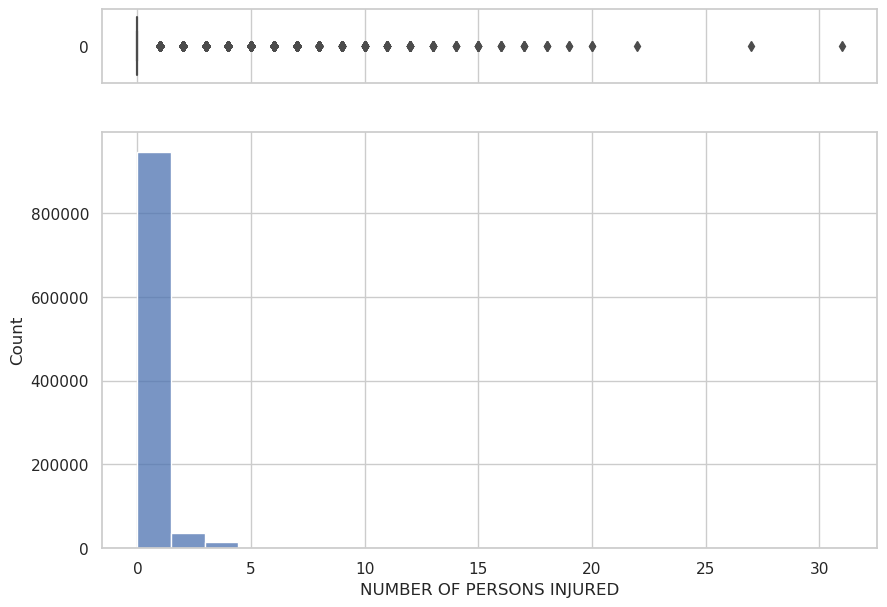

In [21]:
hist_plot(plot_data, column="NUMBER OF PERSONS INJURED")

In [22]:
motor_df.groupBy('NUMBER OF PERSONS INJURED').count().orderBy('count', ascending=False).show()

+-------------------------+------+
|NUMBER OF PERSONS INJURED| count|
+-------------------------+------+
|                      0.0|763251|
|                      1.0|183635|
|                      2.0| 35228|
|                      3.0| 11218|
|                      4.0|  4150|
|                      5.0|  1574|
|                      6.0|   602|
|                      7.0|   252|
|                      8.0|   113|
|                      9.0|    44|
|                     10.0|    32|
|                     11.0|    18|
|                     null|    17|
|                     12.0|    12|
|                     13.0|     9|
|                     15.0|     6|
|                     14.0|     5|
|                     17.0|     4|
|                     16.0|     4|
|                     18.0|     3|
+-------------------------+------+
only showing top 20 rows



* A person with a fatality is a rare event
* Maximum values is 8
* nulls need to be replaced with 0

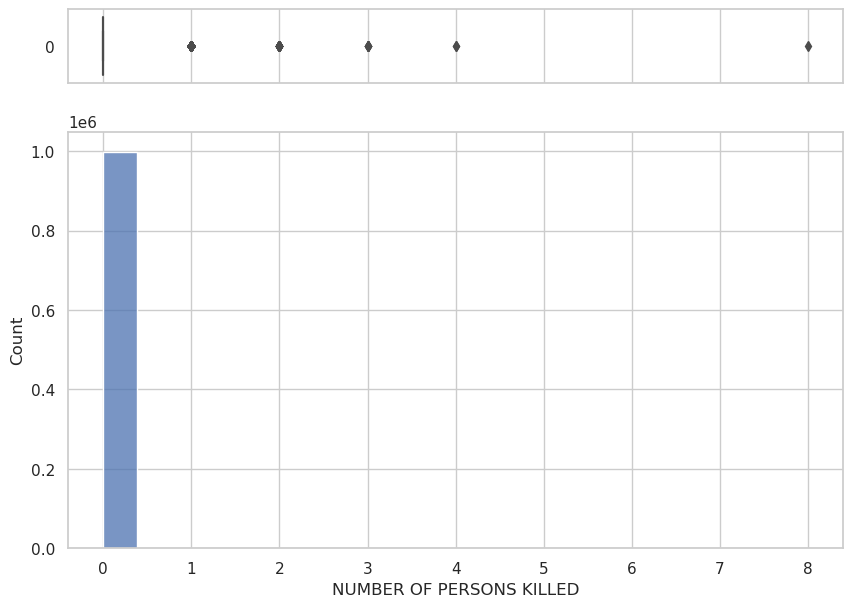

In [23]:
hist_plot(plot_data, column="NUMBER OF PERSONS KILLED")

In [24]:
motor_df.groupBy('NUMBER OF PERSONS KILLED').count().orderBy('count', ascending=False).show()

+------------------------+------+
|NUMBER OF PERSONS KILLED| count|
+------------------------+------+
|                     0.0|998724|
|                     1.0|  1387|
|                     2.0|    34|
|                    null|    30|
|                     3.0|     6|
|                     4.0|     2|
|                     8.0|     1|
+------------------------+------+



* Check if COLLISION_ID has duplicates and was not the case

In [25]:
motor_df.groupby(['COLLISION_ID']) \
    .count() \
    .where('count > 1') \
    .sort('count', ascending=False) \
    .show()

+------------+-----+
|COLLISION_ID|count|
+------------+-----+
+------------+-----+



* Steps that will be implemented to clean string data
* trim white spaces
* Encode data to remove unwanted characters
* Remove punctuation

In [26]:
#Text columns
motor_df\
.withColumn("CROSS STREET NAME", F.trim(F.col("CROSS STREET NAME")))\
.withColumn("CROSS STREET NAME",F.encode(F.col("CROSS STREET NAME"),"US-ASCII") )\
.withColumn("CROSS STREET NAME",F.decode(F.col("CROSS STREET NAME"),"US-ASCII") )\
.withColumn("CROSS STREET NAME", F.upper(F.regexp_replace(F.col("CROSS STREET NAME"), "[^a-zA-Z\\s0-9]", ""))).select(["CROSS STREET NAME"]).show(n=5)

+-----------------+
|CROSS STREET NAME|
+-----------------+
|         BROADWAY|
|        114 PLACE|
|             null|
|        23 AVENUE|
|    BERGEN STREET|
+-----------------+
only showing top 5 rows



* Date & Time information will be extracted for the creation of new columns

In [27]:
#Date information
motor_df.withColumn("year", F.year(F.col("CRASH DATE")))\
.withColumn("month", F.month(F.col("CRASH DATE")))\
.withColumn("dayofmonth", F.dayofmonth(F.col("CRASH DATE")))\
.withColumn("hour", F.hour(F.col("CRASH TIME")))\
.withColumn("minute", F.minute(F.col("CRASH TIME"))).select(["CRASH DATE","CRASH TIME","year","month","dayofmonth","hour","minute"]).show(n=5)

+-------------------+-------------------+----+-----+----------+----+------+
|         CRASH DATE|         CRASH TIME|year|month|dayofmonth|hour|minute|
+-------------------+-------------------+----+-----+----------+----+------+
|2018-11-15 00:00:00|2023-03-21 18:04:00|2018|   11|        15|  18|     4|
|2018-11-15 00:00:00|2023-03-21 08:00:00|2018|   11|        15|   8|     0|
|2018-11-15 00:00:00|2023-03-21 17:45:00|2018|   11|        15|  17|    45|
|2018-11-15 00:00:00|2023-03-21 09:00:00|2018|   11|        15|   9|     0|
|2018-11-15 00:00:00|2023-03-21 18:20:00|2018|   11|        15|  18|    20|
+-------------------+-------------------+----+-----+----------+----+------+
only showing top 5 rows



* The null values of injuries & fatalities will be replaced with 0

In [28]:
# fix numeric
clean_data = motor_df.withColumn('NUMBER OF PERSONS INJURED', F.coalesce(F.col('NUMBER OF PERSONS INJURED').cast('int'), F.lit(0)))\
.withColumn('NUMBER OF PERSONS KILLED', F.coalesce(F.col('NUMBER OF PERSONS KILLED').cast('int'), F.lit(0)))

* LATITUDE values outside the acceptable range will be converted to null

In [29]:
#fix lat lon is -90 and +90
motor_df.select("LATITUDE")\
.withColumn("LATITUDE", F.when(((motor_df["LATITUDE"] <-90) | (motor_df["LATITUDE"] >90)), F.lit(None)).otherwise(motor_df["LATITUDE"]))\
.describe().toPandas()

,summary,LATITUDE
0,count,928440
1,mean,40.58503933664225
2,stddev,2.3862603017588206
3,min,0.0
4,max,41.12615


* LONGITUDE values outside the acceptable range will be converted to null

In [30]:
#Longitude is in the range -180 and +180
motor_df.select("LONGITUDE")\
.withColumn("LONGITUDE", F.when(((motor_df["LONGITUDE"] <-180) | (motor_df["LONGITUDE"] >180)), F.lit(None)).otherwise(motor_df["LONGITUDE"]))\
.describe().toPandas()

,summary,LONGITUDE
0,count,928339
1,mean,-73.66211511318447
2,stddev,4.3331511674755685
3,min,-74.742
4,max,0.0


In [31]:
motor_df.filter((motor_df["LATITUDE"]==0)&(motor_df["LONGITUDE"]==0)).select(["LATITUDE","LONGITUDE"]).show(n=5)

+--------+---------+
|LATITUDE|LONGITUDE|
+--------+---------+
|     0.0|      0.0|
|     0.0|      0.0|
|     0.0|      0.0|
|     0.0|      0.0|
|     0.0|      0.0|
+--------+---------+
only showing top 5 rows



* A Categorical column will be created for injuries and collisons 
  * High - Person killed
  * Medium - Injury & no deaths
  * Low - Collison with no deaths or injury

In [32]:
motor_df. \
withColumn('incident_level',
        F.when(motor_df['NUMBER OF PERSONS INJURED'] > 0, 'Medium')\
           .when(motor_df['NUMBER OF PERSONS KILLED'] > 0, 'High')\
           .otherwise('Low')).select(["NUMBER OF PERSONS INJURED","NUMBER OF PERSONS KILLED","incident_level"]).show(n=5)

+-------------------------+------------------------+--------------+
|NUMBER OF PERSONS INJURED|NUMBER OF PERSONS KILLED|incident_level|
+-------------------------+------------------------+--------------+
|                      1.0|                     0.0|        Medium|
|                      0.0|                     0.0|           Low|
|                      0.0|                     0.0|           Low|
|                      0.0|                     0.0|           Low|
|                      1.0|                     0.0|        Medium|
+-------------------------+------------------------+--------------+
only showing top 5 rows



### [NOAA Weather Data](https://www.ncei.noaa.gov/)

* Weather Station
    * **NAME** - NY CITY CENTRAL PARK, NY US
    * **Network:ID** - GHCND:USW00094728

**AWND** - Average wind speed Number

**DATE** - Date of weather measure Date

**PRCP** - Precipitation Number

**SNOW** - Snowfall Number

**STATION** - Weather Station of observation

**TMAX** - Maximum temperature Plain Number

**TMIN** - Minimum temperature Number

**WT01** - Fog, ice fog, or freezing fog (may include heavy fog) Logical

* Started by loading json file obtained via noaa API

In [84]:
noaa_df = spark.read.option("multiline", "true").option("inferSchema", "true").option("nanValue", "null",).json("./data/staging_weather")

In [85]:
noaa_df.printSchema()

root
 |-- AWND: string (nullable = true)
 |-- DATE: string (nullable = true)
 |-- PRCP: string (nullable = true)
 |-- SNOW: string (nullable = true)
 |-- STATION: string (nullable = true)
 |-- TMAX: string (nullable = true)
 |-- TMIN: string (nullable = true)
 |-- WT01: string (nullable = true)



* Data dimention

In [33]:
print((noaa_df.count(), len(noaa_df.columns)))

(2102, 8)


In [34]:
noaa_df.show(n=15)

+----+----------+----+----+-----------+----+----+-----+
|AWND|      DATE|PRCP|SNOW|    STATION|TMAX|TMIN| WT01|
+----+----------+----+----+-----------+----+----+-----+
|8.50|2016-10-23|0.00| 0.0|USW00094728|  61|  45| null|
|6.04|2016-10-24|0.00| 0.0|USW00094728|  62|  47| null|
|6.49|2016-10-25|0.00| 0.0|USW00094728|  52|  43| null|
|4.03|2016-10-26|0.00| 0.0|USW00094728|  51|  38| null|
|5.14|2016-10-27|1.41| 0.0|USW00094728|  55|  40|    1|
|8.28|2016-10-28|0.00| 0.0|USW00094728|  51|  42|    1|
|4.25|2016-10-29|0.00| 0.0|USW00094728|  64|  39| null|
|3.80|2016-10-30|0.56| 0.0|USW00094728|  76|  54|    1|
|4.92|2016-10-31|0.00| 0.0|USW00094728|  54|  44| null|
|3.13|2016-11-01|0.00| 0.0|USW00094728|  58|  40| null|
|3.13|2016-11-02|0.00| 0.0|USW00094728|  70|  54| null|
|5.14|2016-11-03|0.00| 0.0|USW00094728|  72|  57| null|
|4.70|2016-11-04|0.00| 0.0|USW00094728|  61|  47| null|
|3.13|2016-11-05|0.00| 0.0|USW00094728|  62|  44| null|
|7.61|2016-11-06|0.00| 0.0|USW00094728|  59|  45

* Cashed data to imporve performance

In [86]:
noaa_df = noaa_df.cache()

In [36]:
noaa_df.is_cached

True

* Data characteristics

In [10]:
noaa_df.describe().toPandas()

,summary,AWND,DATE,PRCP,SNOW,STATION,TMAX,TMIN,WT01
0,count,1893,2102,2102,2102,2102,2102,2102,879
1,mean,5.078235604860014,None,0.14523311132254982,0.07274024738344435,None,62.769743101807805,48.90104662226451,1.0
2,stddev,2.401446457496862,None,0.3894469624864649,0.6598097371089309,None,17.753274371498282,16.420222636185816,0.0
3,min,0.00,2016-10-23,0.00,0.0,USW00094728,13,10,1
4,max,9.84,2022-07-25,7.13,9.8,USW00094728,98,9,1


* All columns were casted to their appropiate type

In [120]:
noaa_df = noaa_df.withColumn("DATE",F.to_date("DATE", 'yyyy-MM-dd'))\
    .withColumn("WT01", F.when(F.col("WT01")==1, True).otherwise(False))\
    .withColumn("AWND", F.col("AWND").cast('float'))\
    .withColumn("PRCP", F.col("PRCP").cast('float'))\
    .withColumn("PRCP", F.col("PRCP").cast('float'))\
    .withColumn("SNOW", F.col("SNOW").cast('float'))\
    .withColumn("TMIN",F.col("TMIN").cast('int'))\
    .withColumn("TMAX", F.col("TMAX").cast('int'))

* Looped over columns to identify nulls
* AWND contains 209 nulls and will be replaced with zeros

In [130]:
for col in noaa_df.columns:
    print("*"*50, col, "*"*50)
    print(col, "\t", "null values: ", noaa_df.filter(noaa_df[col].isNull()).count())

************************************************** AWND **************************************************
AWND 	 null values:  209
************************************************** DATE **************************************************
DATE 	 null values:  0
************************************************** PRCP **************************************************
PRCP 	 null values:  0
************************************************** SNOW **************************************************
SNOW 	 null values:  0
************************************************** STATION **************************************************
STATION 	 null values:  0
************************************************** TMAX **************************************************
TMAX 	 null values:  0
************************************************** TMIN **************************************************
TMIN 	 null values:  0
************************************************** WT01 **************************

* Updated Schema

In [131]:
noaa_df.printSchema()

root
 |-- AWND: float (nullable = true)
 |-- DATE: date (nullable = true)
 |-- PRCP: float (nullable = true)
 |-- SNOW: float (nullable = true)
 |-- STATION: string (nullable = true)
 |-- TMAX: integer (nullable = true)
 |-- TMIN: integer (nullable = true)
 |-- WT01: boolean (nullable = false)



In [133]:
noaa_df.show(n=10)

+----+----------+----+----+-----------+----+----+-----+
|AWND|      DATE|PRCP|SNOW|    STATION|TMAX|TMIN| WT01|
+----+----------+----+----+-----------+----+----+-----+
| 8.5|2016-10-23| 0.0| 0.0|USW00094728|  61|  45|false|
|6.04|2016-10-24| 0.0| 0.0|USW00094728|  62|  47|false|
|6.49|2016-10-25| 0.0| 0.0|USW00094728|  52|  43|false|
|4.03|2016-10-26| 0.0| 0.0|USW00094728|  51|  38|false|
|5.14|2016-10-27|1.41| 0.0|USW00094728|  55|  40| true|
|8.28|2016-10-28| 0.0| 0.0|USW00094728|  51|  42| true|
|4.25|2016-10-29| 0.0| 0.0|USW00094728|  64|  39|false|
| 3.8|2016-10-30|0.56| 0.0|USW00094728|  76|  54| true|
|4.92|2016-10-31| 0.0| 0.0|USW00094728|  54|  44|false|
|3.13|2016-11-01| 0.0| 0.0|USW00094728|  58|  40|false|
+----+----------+----+----+-----------+----+----+-----+
only showing top 10 rows



* Updated data summary

In [134]:
noaa_df.describe().toPandas()

,summary,AWND,PRCP,SNOW,STATION,TMAX,TMIN
0,count,1893,2102,2102,2102,2102,2102
1,mean,5.0782356086038,0.14523311082865656,0.07274024746071488,None,62.769743101807805,48.90104662226451
2,stddev,2.401446450231401,0.389446961694786,0.6598097380849249,None,17.753274371498282,16.420222636185816
3,min,0.0,0.0,0.0,USW00094728,13,2
4,max,18.34,7.13,14.8,USW00094728,98,82


* Data distribution for numeric columns

In [125]:
plot_data = noaa_df[['AWND','PRCP','SNOW','TMAX','TMIN']].toPandas()

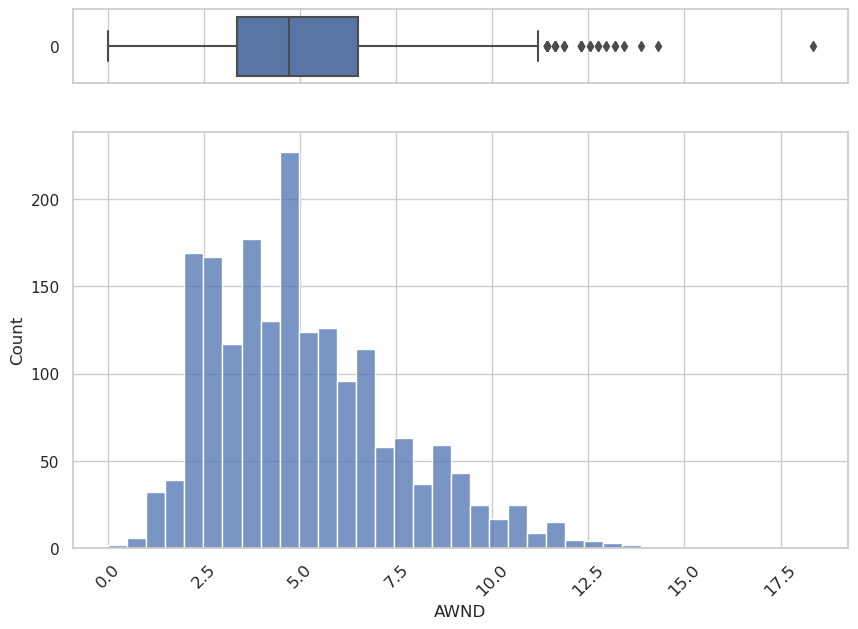

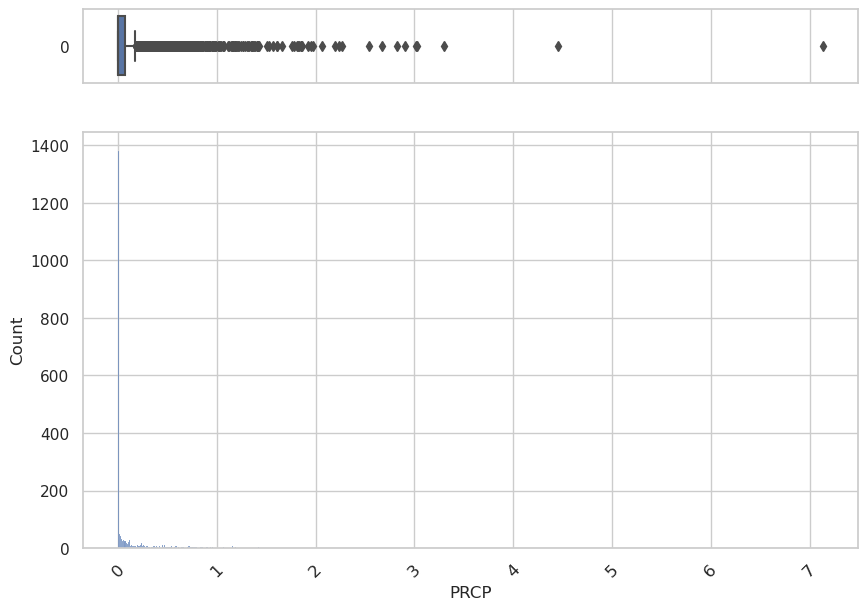

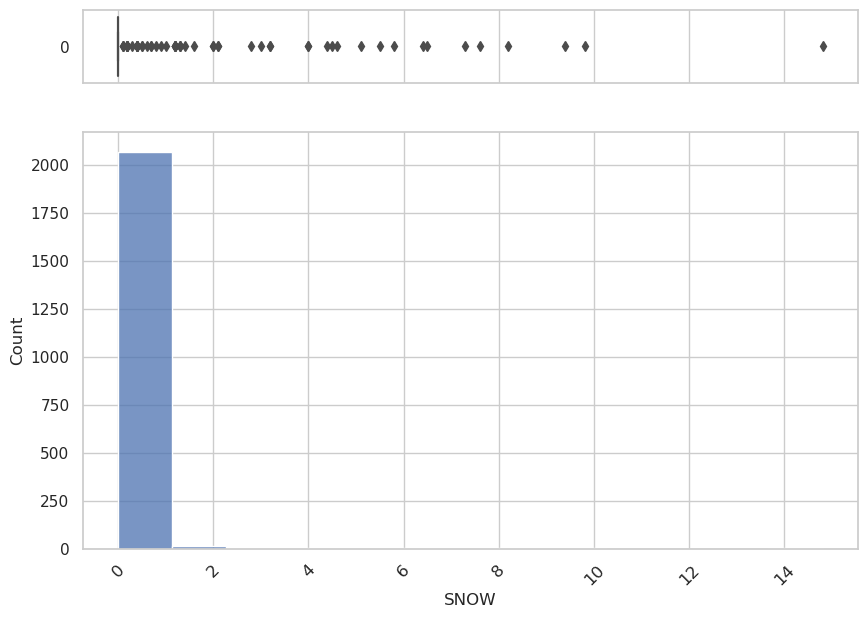

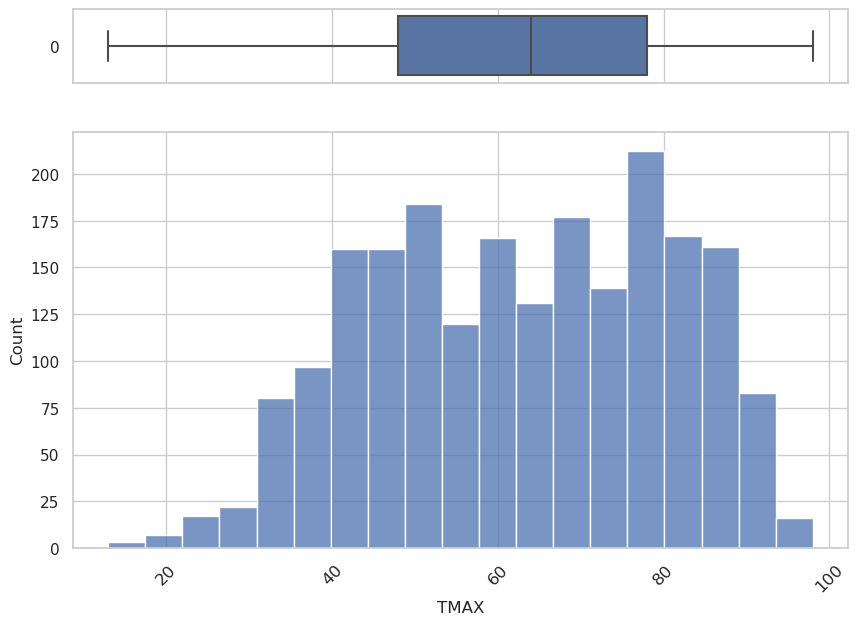

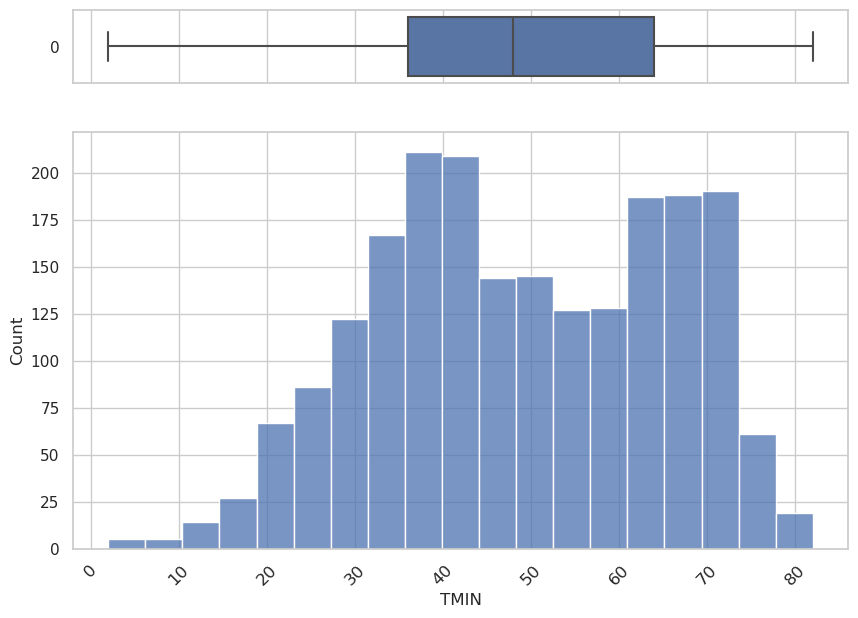

In [129]:
for col in plot_data.columns:
    hist_plot(plot_data, column=col, font=12)

### Steps to clean data

* Replace null in 'AWND'
* Extract Year, Month, and Date from 'DATE' column
* Create AVG 'AVGTEMP' from 'TMIN' & 'TMAX'

In [ ]:
spark.stop()

# Step 3: Define the Data Model
## 3.1 Conceptual Data Model
The project will set up a Data Lake with the following Schema:

### Schema Motor Vehicle Collisions - Crashes

|Name |Description|Type|
|:-----:|:--------:|:--------:|
|borough |Borough where collision occurred|string|
|zip_code |Postal code of incident occurrence|integer|
|latitude |Latitude coordinate for Global Coordinate System|float|
|longitude |Longitude coordinate for Global Coordinate System|float|
|on_street_name |Street on which the collision occurred|string|
|cross_street_name |Nearest cross street to the collision|string|
|off_street_name |Street address if known|string|
|number_of_persons_injured |Number of persons injured|integer|
|number_of_persons_killed |Number of persons killed|integer|
|collision_id |Unique record code generated by system|integer|
|crash_date_year|Year number|integer|
|crash_date_month|Month number|integer|
|crash_date_dayofmonth|Month number|integer|
|hour|Hour Number|integer|
|minute|Minute Number|integer|
|incident_level| Identifies severity of accident|string|
|id| record number used to track data quality failures|integer|

### Schema NOAA Weather Data

|Name |Description|Type|
|:-----:|:--------:|:--------:|
|awnd |Average wind speed Number|float|
|prcp |Precipitation Number|float|
|snow |Snowfall Number|float|
|station |Weather Station of observation|string |
|tmax |Maximum temperature Plain Number|integer|
|tmin  |Minimum temperature Number|integer |
|wt01 |Fog, ice fog, or freezing fog (may include heavy fog)|boolean|
|AVGTEMP|Average of TMIN & TMAX|float|
|date_year|Year of weather|integer|
|date_month|Month of weather|integer|
|date_dayofmonth|Date of weather|integer|
|avgtemp| Average of tmin & tmax|float|
|id| record number used to track data quality failures|integer|

## 3.2 Mapping Out Data Pipelines

1. Injest data - using Spark
2. Clean data - Will clean data using Spark native function for optimized execution
3. Validate data - Will use custom testing class to check various aspects of the data
4. Save output - Parquet files for motor & NOAA data
5. Extract pipeline metrics - Will check records received, time, throughput, and records processed


In [4]:
from pyspark.sql import SparkSession
from project_lib import ETL
from project_lib import TestSparkData
from project_lib import Utilities
spark = SparkSession.builder.appName("incident_data_pipeline").getOrCreate()

# Step 4: Run ETL to Model the Data

## 4.1 Create the data model

* performs folder checks

In [5]:
util = Utilities()
util.initialize_project()

./data/staging_weather/ Exists
./data/staging_collision/ Exists
./data/output/ Exists
./data/output/rejected_records/ Exists
./data/log/ Exists
All folders contain files


In [2]:
spark

In [3]:
pipeline = ETL(spark)
pipeline.main()

************************* Motor Collision Data *************************
************************* Successful Test *************************
test_collision_id_null
test_crash_date_year_null
test_number_of_persons_injured_null
test_number_of_persons_killed_null
test_incident_level_null
test_collision_id_duplicate
test_zip_code_length_5
test_latitude_range_-90_90
test_longitude_range_-180_180
test_number_of_persons_injured_range_0_50
test_number_of_persons_killed_range_0_50
test_crash_date_month_range_1_12
test_crash_date_dayofmonth_range_1_31
test_hour_range_0_23
test_minute_range_0_60
**************************************************
************************* NOAA Weather Data *************************
************************* Successful Test *************************
test_station_null
test_wt01_null
test_awnd_range_0_25
test_prcp_range_0_15
test_snow_range_0_25
test_tmin_range_0_120
test_tmax_range_0_120
test_date_month_range_1_12
test_date_dayofmonth_range_1_31
test_avgtemp_range_0

## 4.2 Data Quality Checks

* Data quality test are performed by using the `TestSparkData` class
* Available test are range_test, null_test, duplicate_test and length_test
* Each method takes a list of columns or column value pair to run the test
* The class also has methods to evaluate and print results

In [3]:
clean_noa_df = pipeline.clean_noaa_data()

In [5]:
clean_noa_df.show(n=5)

+-----------------+----+----+-----------+----+----+-----+---------+----------+---------------+-------+---+
|             awnd|prcp|snow|    station|tmin|tmax| wt01|date_year|date_month|date_dayofmonth|avgtemp| id|
+-----------------+----+----+-----------+----+----+-----+---------+----------+---------------+-------+---+
|              8.5| 0.0| 0.0|USW00094728|  45|  61|false|     2016|        10|             23|   53.0|  0|
|6.039999961853027| 0.0| 0.0|USW00094728|  47|  62|false|     2016|        10|             24|   54.5|  1|
|6.489999771118164| 0.0| 0.0|USW00094728|  43|  52|false|     2016|        10|             25|   47.5|  2|
| 4.03000020980835| 0.0| 0.0|USW00094728|  38|  51|false|     2016|        10|             26|   44.5|  3|
|5.139999866485596|1.41| 0.0|USW00094728|  40|  55| true|     2016|        10|             27|   47.5|  4|
+-----------------+----+----+-----------+----+----+-----+---------+----------+---------------+-------+---+
only showing top 5 rows



In [15]:
noa_null_tst_lst = ['station', 'wt01']

noa_range_tst_lst = [('awnd',0, 25), ('prcp',0, 15)]

testing = TestSparkData()

noa_null_rslt = testing.null_test(clean_noa_df, noa_null_tst_lst)

noa_rng_rslt = testing.range_test(clean_noa_df, noa_range_tst_lst)

all_noa_test = [noa_null_rslt, noa_rng_rslt]

noa_test_results = testing.evaluate_test(spark, all_noa_test)

testing.print_test_results("NOAA Weather Data", noa_test_results)

************************* NOAA Weather Data *************************
************************* Successful Test *************************
test_station_null
test_wt01_null
test_awnd_range_0_25
test_prcp_range_0_15
**************************************************


In [ ]:
spark.stop()

# Step 5: Complete Project Write Up

1. Clearly state the rationale for the choice of tools and technologies for the project.
    * For this project I used Apache Spark because its ability to scale and ease of use via python. Spark methods allows for manipulation of large amounts of data across clusters of computers and conversion of outputs to various formats such as the parquet files used in the project.
2. Propose how often the data should be updated and why.
    * The data should be updated daily because the motor collision data is updated in that frequency.
3. Write a description of how you would approach the problem differently under the following scenarios:
     1. The data was increased by 100x.
         * I would use Spark because its ability to scale and add additional resources to complete the job.
     2. The data populates a dashboard that must be updated on a daily basis by 7am every day.
         * I would implement Apache Airflow and schedule the job to run within time frame.
     3. The database needed to be accessed by 100+ people.
         * I would split the data or use replication.